In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy

#import csv
firedata_path='fire-acres.csv'
wildland_path='Wildland_Fire_Locations_Full_History.csv'
firedata=pd.read_csv(firedata_path)
wildland=pd.read_csv((wildland_path),low_memory=False)
firedata.head()

,Year,Fires,Acres
0,2020,58950,10122336
1,2019,50477,4664364
2,2018,58083,8767492
3,2017,71499,10026086
4,2016,67743,5509995


Text(0.5, 1.0, 'Number of Fires by Year in the US')

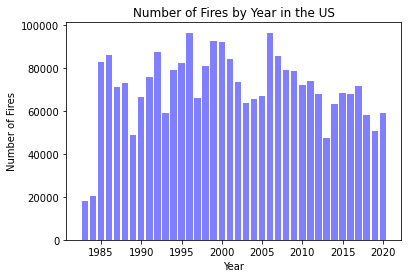

In [2]:
x_axis=firedata['Year']
y_axis=firedata['Fires']
plt.bar(x_axis, y_axis, color='maroon', alpha=0.5, align='center')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.title('Number of Fires by Year in the US')


In [3]:
plt.clf()
plt.cla()
plt.close()

Text(0.5, 1.0, 'Number of Acres Burned by Year in the US')

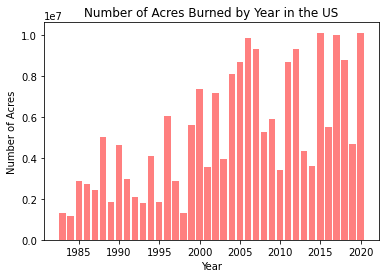

In [4]:
x_axis=firedata['Year']
y_axis=firedata['Acres']
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align='center')
plt.xlabel('Year')
plt.ylabel('Number of Acres')
plt.title('Number of Acres Burned by Year in the US')


In [5]:
plt.clf()
plt.cla()
plt.close()

In [6]:
wildland.head()

,X,Y,OBJECTID,ABCDMisc,ADSPermissionState,CalculatedAcres,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,...,UniqueFireIdentifier,WFDSSDecisionStatus,CreatedBySystem,ModifiedBySystem,IsDispatchComplete,OrganizationalAssessment,StrategicDecisionPublishDate,CreatedOnDateTime_dt,ModifiedOnDateTime_dt,Source
0,-104.457511,45.785037,1,NaN,CERTIFIED,50.64,2020/08/06 23:13:07+00,2020/08/06 23:13:24+00,50.6,20.0,...,2020-MTLG42-000224,No Decision,wildcad,INFORM_Inspector,0,NaN,NaN,2020/08/06 19:50:29+00,2020/08/12 20:46:01+00,IRWIN
1,-118.180712,33.808985,2,NaN,DEFAULT,NaN,NaN,NaN,NaN,0.1,...,2020-CALAC-066100,No Decision,lacocad,lacocad,0,NaN,NaN,2020/02/28 20:52:36+00,2020/02/28 20:52:36+00,IRWIN
2,-114.835414,48.073946,3,NaN,DEFAULT,NaN,2017/10/18 00:30:00+00,2017/10/18 00:35:00+00,50.0,50.0,...,2017-MTNWS-000878,NaN,wildcad,wildcad,0,NaN,NaN,2017/10/18 13:46:40+00,2017/11/09 22:08:19+00,IRWIN
3,-117.153901,33.176394,4,NaN,DEFAULT,NaN,NaN,NaN,NaN,NaN,...,2019-CAMVU-009269,No Decision,firecode,firecode,0,NaN,NaN,2019/07/01 20:10:12+00,2019/07/01 20:10:12+00,IRWIN
4,-121.104180,38.834727,5,NaN,DEFAULT,NaN,NaN,NaN,NaN,NaN,...,2016-CANEU-014375,NaN,firecode,firecode,0,NaN,NaN,2016/06/20 22:39:02+00,2016/06/20 22:39:02+00,IRWIN


In [7]:
wildlandcheck=wildland.dropna(subset=['CalculatedAcres'])
wildlandcheck.head()

,X,Y,OBJECTID,ABCDMisc,ADSPermissionState,CalculatedAcres,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,...,UniqueFireIdentifier,WFDSSDecisionStatus,CreatedBySystem,ModifiedBySystem,IsDispatchComplete,OrganizationalAssessment,StrategicDecisionPublishDate,CreatedOnDateTime_dt,ModifiedOnDateTime_dt,Source
0,-104.457511,45.785037,1,NaN,CERTIFIED,50.6400,2020/08/06 23:13:07+00,2020/08/06 23:13:24+00,50.60,20.0,...,2020-MTLG42-000224,No Decision,wildcad,INFORM_Inspector,0,NaN,NaN,2020/08/06 19:50:29+00,2020/08/12 20:46:01+00,IRWIN
99,-115.748812,40.617506,107,NaN,CERTIFIED,2285.7706,2020/08/03 23:00:00+00,2020/09/02 15:00:00+00,5985.90,5.0,...,2020-NVECFX-010145,Approved Decision,wildcad,INFORM_Inspector,0,Type 3 Incident,2020/07/27 17:45:30+00,2020/07/20 00:32:18+00,2020/10/02 13:21:05+00,IRWIN
119,-117.933463,40.940289,131,NaN,DEFAULT,3355.3934,2017/07/10 23:25:00+00,2017/07/11 03:00:00+00,3295.82,250.0,...,2017-NVWID-020138,Pending Decision,wildcad,wildcad,0,NaN,NaN,2017/07/09 03:34:40+00,2018/02/02 18:29:38+00,IRWIN
210,-111.804412,44.813806,229,NaN,DEFAULT,251.3342,NaN,NaN,330.00,0.5,...,2020-MTBDF-006672,Approved Decision,wildcad,wildcad,0,Type 4 Incident,2020/09/16 16:16:17+00,2020/09/12 18:26:55+00,2020/12/29 15:14:22+00,IRWIN
297,-115.451402,47.013340,323,NaN,DEFAULT,253.8052,2016/10/06 20:25:00+00,2016/10/19 15:59:59+00,1030.00,5.0,...,2016-IDIPF-000398,Approved Decision,wildcad,wildcad,0,NaN,NaN,2016/08/16 21:48:05+00,2016/10/31 19:23:31+00,IRWIN


In [8]:
wildlandsummary=wildland.agg({'CalculatedAcres':['count', 'max']})
#wildlandsummary2=wildland.agg({'DailyAcres':['count', 'max']}
wildlandsummary

,CalculatedAcres
count,3166.00
max,589835.44


In [9]:
wildlandsummary2=wildland.agg({'DailyAcres':['count', 'max']})
wildlandsummary2

,DailyAcres
count,120727.0
max,1032648.0


In [10]:
wildland.columns

Index(['X', 'Y', 'OBJECTID', 'ABCDMisc', 'ADSPermissionState',
       'CalculatedAcres', 'ContainmentDateTime', 'ControlDateTime',
       'DailyAcres', 'DiscoveryAcres', 'DispatchCenterID',
       'FinalFireReportApprovedByTitle', 'FinalFireReportApprovedByUnit',
       'FinalFireReportApprovedDate', 'FireBehaviorGeneral',
       'FireBehaviorGeneral1', 'FireBehaviorGeneral2', 'FireBehaviorGeneral3',
       'FireCause', 'FireCauseGeneral', 'FireCauseSpecific', 'FireCode',
       'FireDepartmentID', 'FireDiscoveryDateTime', 'FireMgmtComplexity',
       'FireOutDateTime', 'FireStrategyConfinePercent',
       'FireStrategyFullSuppPercent', 'FireStrategyMonitorPercent',
       'FireStrategyPointZonePercent', 'FSJobCode', 'FSOverrideCode', 'GACC',
       'ICS209ReportDateTime', 'ICS209ReportForTimePeriodFrom',
       'ICS209ReportForTimePeriodTo', 'ICS209ReportStatus',
       'IncidentManagementOrganization', 'IncidentName',
       'IncidentShortDescription', 'IncidentTypeCategory', 'Incide

In [11]:
wildlandclean=wildland[['OBJECTID','X', 'Y','UniqueFireIdentifier','DailyAcres', 
                        'FireDiscoveryDateTime','FireCause', 'FireOutDateTime', 'POOState']]
wildlandclean2=wildlandclean.dropna()
wildlandclean2

,OBJECTID,X,Y,UniqueFireIdentifier,DailyAcres,FireDiscoveryDateTime,FireCause,FireOutDateTime,POOState
0,1,-104.457511,45.785037,2020-MTLG42-000224,50.6,2020/08/06 18:58:00+00,Human,2020/08/12 14:00:00+00,US-MT
2,3,-114.835414,48.073946,2017-MTNWS-000878,50.0,2017/10/17 20:20:24+00,Human,2017/11/09 21:59:59+00,US-MT
5,6,-89.069725,31.068196,2020-MSMNF-000308,1.0,2020/11/23 19:17:00+00,Human,2020/11/30 14:29:59+00,US-MS
6,7,-111.414812,40.072836,2019-UTUWF-000883,170.0,2019/10/26 21:29:00+00,Unknown,2019/11/13 00:14:59+00,US-UT
7,8,-111.575112,44.637596,2020-MTCES-006641,0.1,2020/08/27 14:06:38+00,Natural,2020/08/27 20:52:59+00,US-MT
...,...,...,...,...,...,...,...,...,...
174713,195220,-69.798737,44.734872,2021-MEMES-21002354,0.1,2021/04/13 18:00:00+00,Human,2021/04/13 18:59:59+00,US-ME
174714,195221,-69.670228,44.278842,2021-MEMES-21002346,0.9,2021/04/13 16:01:00+00,Human,2021/04/13 17:28:00+00,US-ME
174717,195224,-70.636104,43.177407,2021-MEMES-21002343,0.1,2021/04/13 15:20:00+00,Human,2021/04/13 15:49:59+00,US-ME
174736,195243,-69.804655,45.653044,2021-MEMES-21002360,0.3,2021/04/13 20:00:00+00,Human,2021/04/13 21:57:00+00,US-ME


In [28]:
import datetime as dt
#raw_data['Mycol'] =  pd.to_datetime(raw_data['Mycol'], format='%d%b%Y:%H:%M:%S.%f')
# wildlandclean2['FireDiscoveryDateTime'] = pd.to_datetime(wildlandclean2['FireDiscoveryDateTime'], format='YYYY/bb/dd')
print(wildlandclean2.dtypes)

OBJECTID                   int64
X                        float64
Y                        float64
UniqueFireIdentifier      object
DailyAcres               float64
FireDiscoveryDateTime     object
FireCause                 object
FireOutDateTime           object
POOState                  object
dtype: object


In [16]:
#print(wildlandclean2.dtypes)
# convert_dict={'X':float,
#              'Y':float,
#               'UniqueFireIdentifier':str,
#               'DailyAcres':float, 
#               'FireDiscoveryDateTime':dt.datetime,
#               'FireCause':str, 
#               'FireOutDateTime':%d%b%Y:%H:%M:%S.%f, 
#               'POOState':str}
# firefiles=wildlandclean2.astype(convert_dict)
# print(firefliles.dtypes)

SyntaxError: invalid syntax (<ipython-input-16-c44c22ff7b72>, line 6)